In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.gridspec as gridspec

In [3]:
# Data Loading and Preprocessing
df = pd.read_csv('project_1_with_extreme1.1.csv', parse_dates=['time'])
df.set_index('time', inplace=True)

In [4]:
wind_u_col = "UBOT"  # Zonal wind component
wind_v_col = "VBOT"  # Meridional wind component

df["wind_speed"] = np.sqrt(df[wind_u_col]**2 + df[wind_v_col]**2)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27374 entries, 2006-01-02 to 2080-12-31
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TREFMXAV_U           27374 non-null  float64
 1   FLNS                 27374 non-null  float64
 2   FSNS                 27374 non-null  float64
 3   PRECT                27374 non-null  float64
 4   PRSN                 27374 non-null  float64
 5   QBOT                 27374 non-null  float64
 6   TREFHT               27374 non-null  float64
 7   UBOT                 27374 non-null  float64
 8   VBOT                 27374 non-null  float64
 9   lat                  27374 non-null  float64
 10  lon                  27374 non-null  float64
 11  year                 27374 non-null  int64  
 12  month                27374 non-null  int64  
 13  UVBOT                27374 non-null  float64
 14  TREFMXAV_U_C         27374 non-null  float64
 15  TREFHT_C           

In [5]:
# Define parameters and events
numeric_cols = ['TREFMXAV_U_C', 'FLNS', 'FSNS', 'PRECT', 'PRSN', 'QBOT',
               'TREFHT_C', 'UBOT', 'VBOT', 'wind_speed']
events = ['heatwave', 'cold_days', 'heavy_precipitation', 'strong_winds']
palette = {'Extreme': '#ff7f0e', 'Normal': '#1f77b4'}

1. **Extreme Event Analysis (`analyze_extreme_event`)**  
   Performs a multi-faceted analysis of extreme weather events through:  
   - **Mean Comparison**: Quantifies differences in meteorological variables between extreme and normal days via horizontal bar charts with significance markers (`*** p<0.001`, `** p<0.01`, `* p<0.05`)  
   - **Distribution Comparison**: Visualizes parameter distributions (e.g., humidity `QBOT`) between event/normal days using violin plots  
   - **Quartile Analysis**: Analyzes event occurrence rates across parameter quartiles to identify threshold effects  
   - **Statistical Reporting**: Returns a DataFrame with mean values, differences, percentage changes, and Welch's t-test p-values  

2. **Core Functionality**  
   - Automated data segmentation into extreme/normal groups  
   - Multi-panel visualization (2x2 grid) for holistic analysis  
   - Dynamic significance annotation based on statistical thresholds  
   - Batch processing support through event iteration  
   - High-resolution image output (`_mean_diff_QBOT_analysis.png`)  

3. **Technical Implementation**  
   - GridSpec layout for complex plot arrangement  
   - Welch's t-test for unequal variance comparisons  
   - Quartile-based event probability calculation  
   - Color-coded visualization using predefined palette  
   - Automated result formatting and sorting by significance  


Analyzing HEATWAVE:
[0.0, 2.3986406186028502e-293, 0.0, 2.5687346875795982e-263, 8.895237213178547e-27, 0.0, 0.0, 3.060342376205549e-190, 6.95702841085041e-239, 0.0]


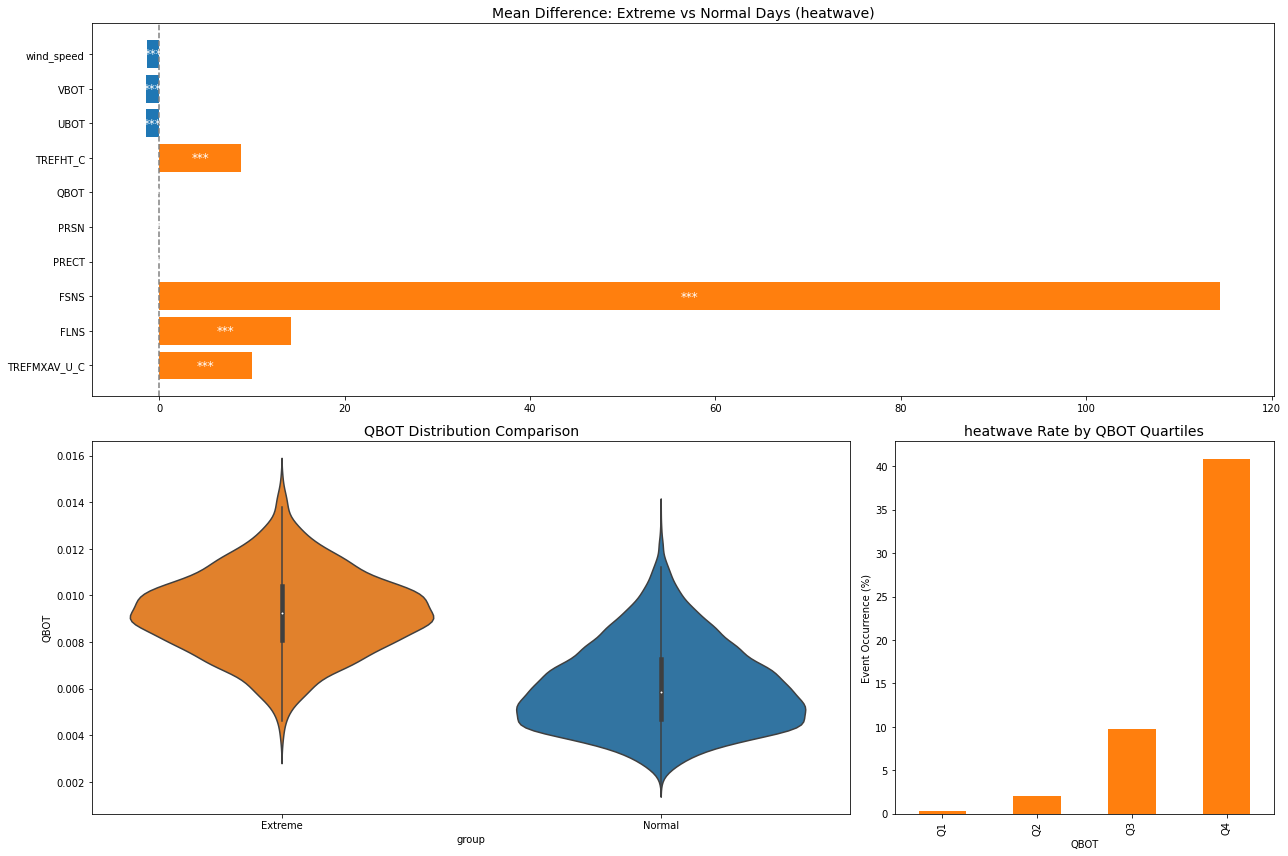

,Extreme_Mean,Normal_Mean,Mean_Diff,Percent_Change,P_Value
TREFMXAV_U_C,24.4065,14.3568,10.0496,69.9991,0.0
FSNS,196.3350,81.8873,114.4477,139.7626,0.0
QBOT,0.0093,0.0061,0.0031,51.4885,0.0
TREFHT_C,19.3890,10.5583,8.8307,83.6372,0.0
wind_speed,3.1381,4.4305,-1.2924,-29.1697,0.0
FLNS,55.3297,41.1154,14.2143,34.5717,0.0
PRECT,0.0000,0.0000,-0.0000,-56.8266,0.0
VBOT,0.2887,1.6882,-1.3995,-82.8968,0.0
UBOT,-0.0906,1.3695,-1.4601,-106.6179,0.0
PRSN,0.0000,0.0000,-0.0000,-99.9982,0.0



Analyzing COLD_DAYS:
[0.0, 1.0263285617993454e-89, 3.1221657900133263e-287, 3.253269516616117e-40, 5.801819731043912e-19, 0.0, 0.0, 5.327717186031534e-24, 1.468204343675937e-117, 1.122588998756675e-26]


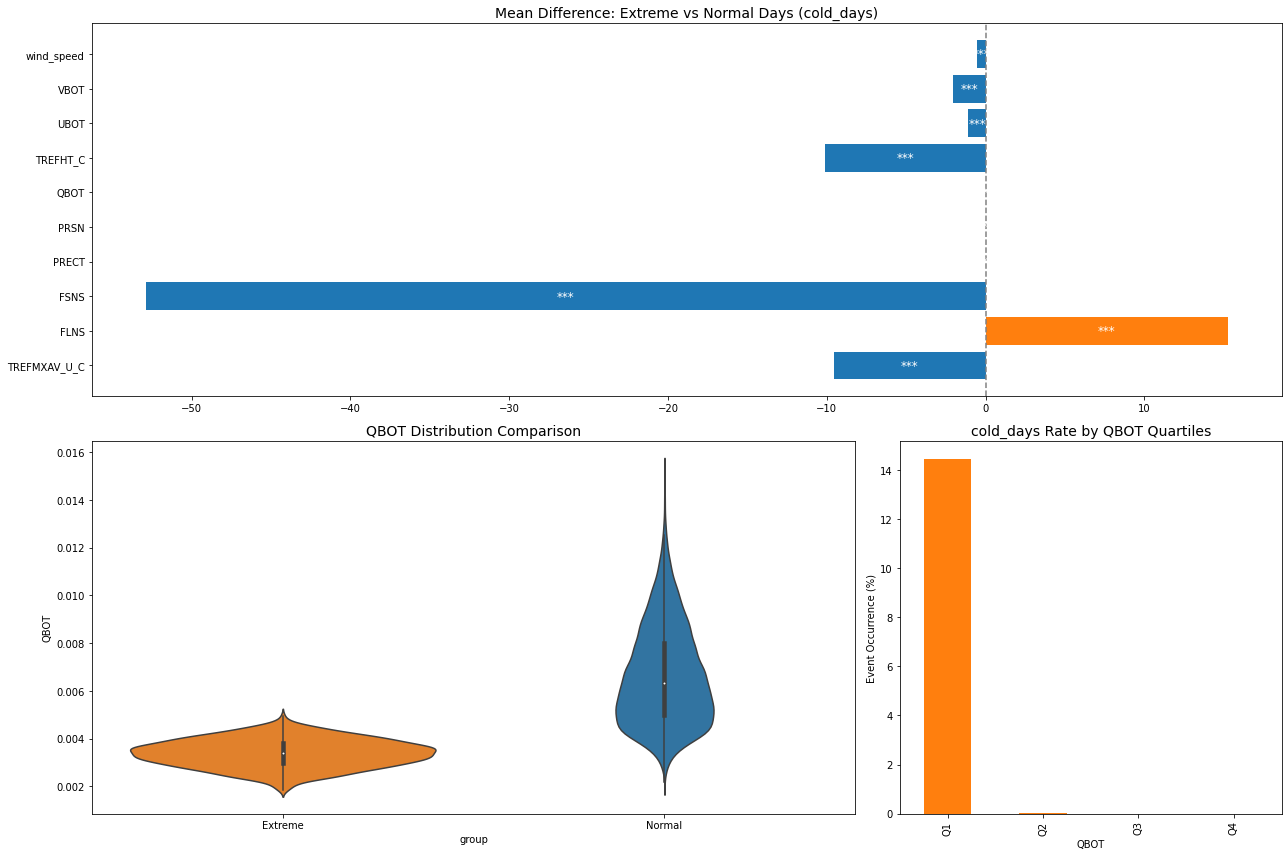

,Extreme_Mean,Normal_Mean,Mean_Diff,Percent_Change,P_Value
TREFMXAV_U_C,6.4921,16.0315,-9.5394,-59.5043,0.0
QBOT,0.0034,0.0066,-0.0033,-48.9645,0.0
TREFHT_C,1.9559,12.0934,-10.1375,-83.8266,0.0
FSNS,46.0706,98.9403,-52.8697,-53.4360,0.0
VBOT,-0.4530,1.5766,-2.0296,-128.7340,0.0
FLNS,57.6757,42.4443,15.2314,35.8857,0.0
PRECT,0.0000,0.0000,-0.0000,-49.3443,0.0
wind_speed,3.7082,4.2803,-0.5721,-13.3657,0.0
UBOT,0.1350,1.2154,-1.0805,-88.8945,0.0
PRSN,0.0000,0.0000,0.0000,8729.2813,0.0



Analyzing HEAVY_PRECIPITATION:
[5.146005822012633e-24, 0.0, 0.0, 0.0, 1.5062897567547554e-07, 1.421344303215104e-90, 0.009521838954637695, 4.307957564891565e-25, 4.268690752439431e-32, 6.735719587218277e-24]


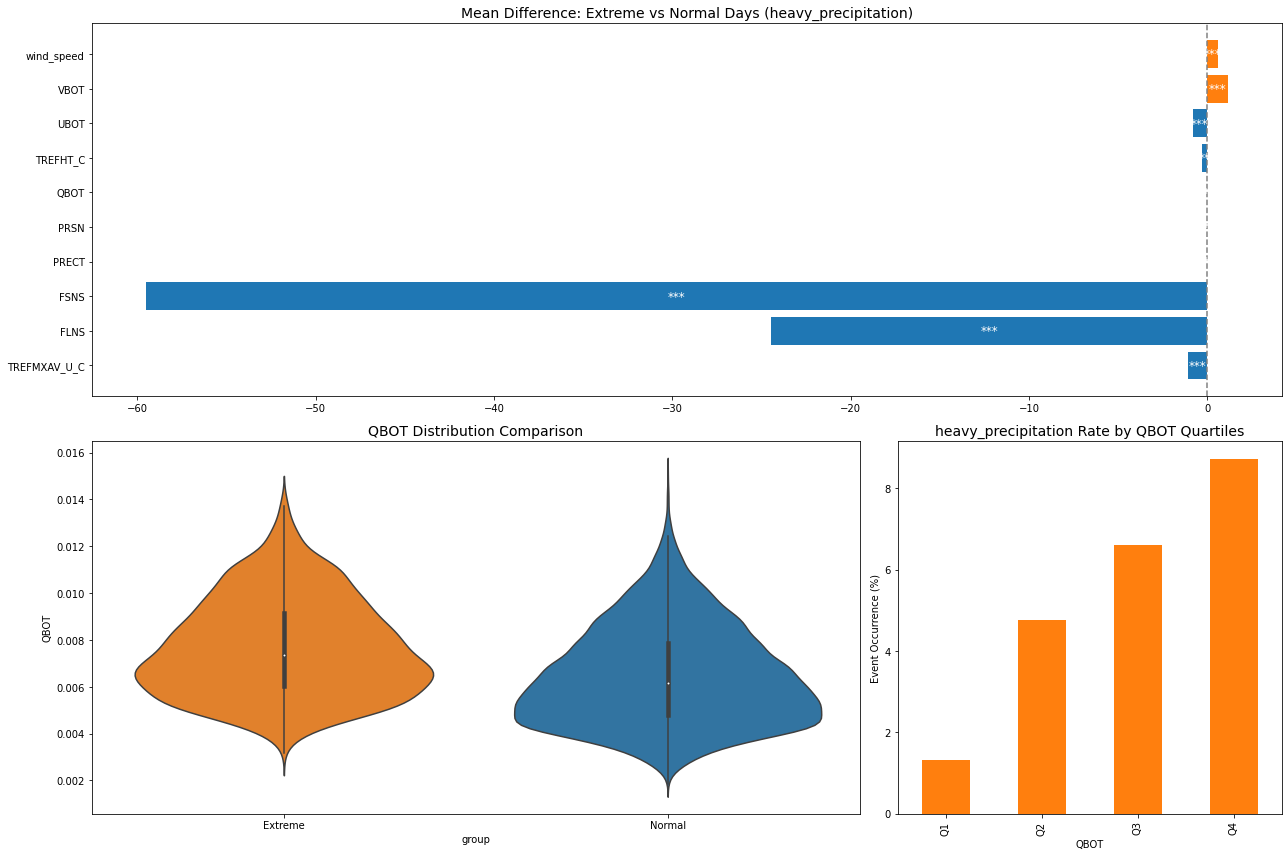

,Extreme_Mean,Normal_Mean,Mean_Diff,Percent_Change,P_Value
FLNS,19.8537,44.3033,-24.4496,-55.1869,0.0000
FSNS,40.7058,100.2085,-59.5027,-59.3789,0.0000
PRECT,0.0000,0.0000,0.0000,656.7658,0.0000
QBOT,0.0077,0.0065,0.0012,18.6253,0.0000
VBOT,2.5786,1.4423,1.1363,78.7806,0.0000
UBOT,0.3935,1.2206,-0.8270,-67.7589,0.0000
TREFMXAV_U_C,14.6515,15.7446,-1.0932,-6.9431,0.0000
wind_speed,4.8166,4.2281,0.5886,13.9202,0.0000
PRSN,0.0000,0.0000,0.0000,1188.7092,0.0000
TREFHT_C,11.4528,11.7419,-0.2891,-2.4620,0.0095



Analyzing STRONG_WINDS:
[8.739888887860964e-285, 5.3268152679100645e-115, 0.0, 2.302960460076982e-79, 0.19912133567220489, 1.8947234775948148e-117, 3.951471831966926e-163, 2.7083897663120237e-226, 0.0, 0.0]


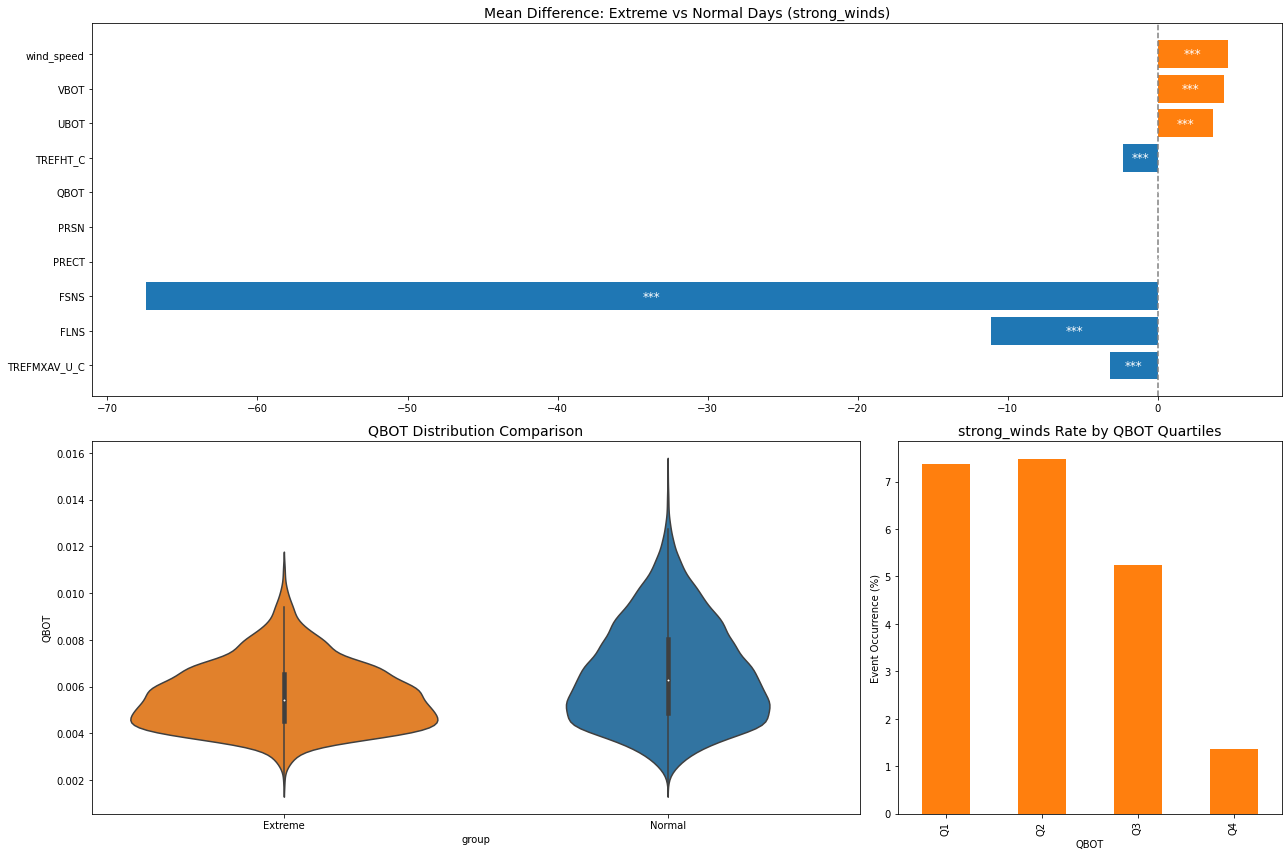

,Extreme_Mean,Normal_Mean,Mean_Diff,Percent_Change,P_Value
FSNS,33.2179,100.6447,-67.4268,-66.9949,0.0000
VBOT,5.6700,1.2668,4.4033,347.5924,0.0000
wind_speed,8.6506,4.0106,4.6400,115.6954,0.0000
TREFMXAV_U_C,12.6513,15.8583,-3.2070,-20.2227,0.0000
UBOT,4.6360,0.9801,3.6559,373.0017,0.0000
TREFHT_C,9.5363,11.8506,-2.3143,-19.5289,0.0000
QBOT,0.0056,0.0066,-0.0010,-14.5318,0.0000
FLNS,32.4913,43.5914,-11.1000,-25.4638,0.0000
PRECT,0.0000,0.0000,0.0000,94.5980,0.0000
PRSN,0.0000,0.0000,-0.0000,-39.4614,0.1991


In [6]:
def analyze_extreme_event(event_name):
    # Data splitting
    extreme_days = df[df[event_name]]
    normal_days = df[~df[event_name]]
    
    # Create figure layout
    plt.figure(figsize=(18, 12))
    gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1])
    
    # Plot 1: Mean comparison with significance markers
    ax1 = plt.subplot(gs[0, :])
    mean_diff = (extreme_days[numeric_cols].mean() - normal_days[numeric_cols].mean())
    p_values = [stats.ttest_ind(extreme_days[col], normal_days[col], equal_var=False)[1] 
                for col in numeric_cols]
    
    print(p_values)
    
    bars = ax1.barh(numeric_cols, mean_diff, color=np.where(mean_diff > 0, palette['Extreme'], palette['Normal']))
    for i, (p, bar) in enumerate(zip(p_values, bars)):
        # Determine significance stars
        if p < 0.001:
            stars = '***'
        elif p < 0.01:
            stars = '**'
        elif p < 0.05:
            stars = '*'
        else:
            continue
            
        ax1.text(bar.get_width()/2, 
                bar.get_y() + bar.get_height()/2, 
                stars, 
                ha='center', 
                va='center', 
                color='white', 
                fontsize=12)
    
    ax1.set_title(f'Mean Difference: Extreme vs Normal Days ({event_name})', fontsize=14)
    ax1.axvline(0, color='gray', linestyle='--')
    
    # Plot 2: Distribution comparison (example parameter)
    ax2 = plt.subplot(gs[1, 0])
    example_param = 'QBOT'  # Can be parameterized
    combined_data = pd.concat([
        extreme_days[[example_param]].assign(group='Extreme'),
        normal_days[[example_param]].assign(group='Normal')
    ])
    sns.violinplot(x='group', y=example_param, data=combined_data, 
                  palette=palette, ax=ax2)
    ax2.set_title(f'{example_param} Distribution Comparison', fontsize=14)
    
    # Plot 3: Event occurrence by parameter quartiles
    ax3 = plt.subplot(gs[1, 1])
    param_quartiles = pd.qcut(df['QBOT'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    event_rate = df.groupby(param_quartiles)[event_name].mean() * 100
    event_rate.plot(kind='bar', color=palette['Extreme'], ax=ax3)
    ax3.set_title(f'{event_name} Rate by QBOT Quartiles', fontsize=14)
    ax3.set_ylabel('Event Occurrence (%)')
    
    plt.tight_layout()
    filename = f"{event_name}_mean_diff_QBOT_analysis.png"
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.show()
    
    # Return statistical results
    results = pd.DataFrame({
        'Extreme_Mean': extreme_days[numeric_cols].mean(),
        'Normal_Mean': normal_days[numeric_cols].mean(),
        'Mean_Diff': mean_diff,
        'Percent_Change': (mean_diff / normal_days[numeric_cols].mean()) * 100,
        'P_Value': p_values
    })
    return results.sort_values('P_Value')

# Analyze all events
for event in events:
    print(f"\n{'='*40}\nAnalyzing {event.upper()}:\n{'='*40}")
    results = analyze_extreme_event(event)
    display(results.round(4))

1. **Variables vs Events Correlation Analysis (`event_correlation.png`):**  
   Calculates and visualizes Pearson correlation coefficients between meteorological variables and extreme event occurrences using a heatmap. Identifies key drivers of specific events by showing directional relationships (positive/negative correlations) between atmospheric conditions (temperature, humidity, wind, etc.) and event frequencies.

2. **Inter-Variable Correlation Matrix (`variable_correlation_matrix.png`):**  
   Generates a triangular correlation matrix heatmap to examine pairwise relationships between meteorological variables. Detects multicollinearity between predictors and reveals underlying atmospheric interaction patterns by masking redundant upper triangle values, focusing on essential variable couplings.

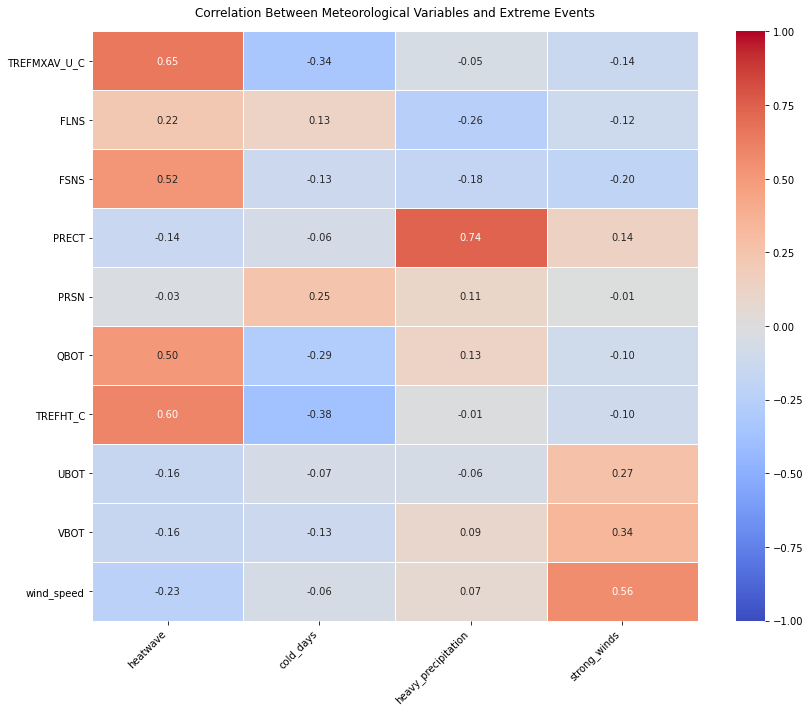

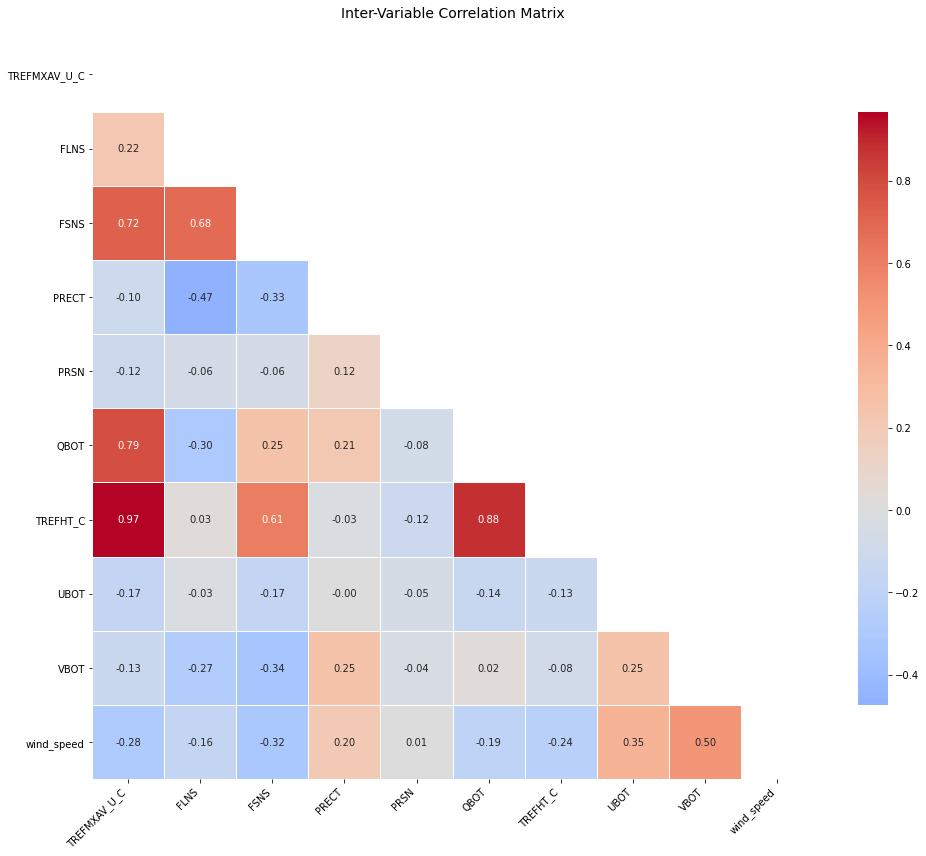

In [36]:
# Correlation Analysis
numeric_cols = ['TREFMXAV_U_C', 'FLNS', 'FSNS', 'PRECT', 'PRSN', 'QBOT',
               'TREFHT_C', 'UBOT', 'VBOT', 'wind_speed']
events = ['heatwave', 'cold_days', 'heavy_precipitation', 'strong_winds']

# plot 1: Variables vs Events Correlation
plt.figure(figsize=(12, 10))
corr_events = df[numeric_cols + events].corr()
sns.heatmap(
    corr_events.loc[numeric_cols, events], 
    annot=True, 
    cmap='coolwarm',
    vmin=-1, 
    vmax=1,
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation Between Meteorological Variables and Extreme Events', pad=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('event_correlation.png', dpi=300, bbox_inches='tight') 
plt.show()


# plot 2: Inter-Variable Correlation Matrix
plt.figure(figsize=(14, 12))
corr_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Upper triangle mask

heatmap = sns.heatmap(
    corr_matrix, 
    mask=mask,
    annot=True,
    cmap='coolwarm', 
    center=0,
    fmt=".2f", 
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,
    ha='right',
    fontsize=10
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    rotation=0,
    fontsize=10
)

plt.title('Inter-Variable Correlation Matrix', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('variable_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

1. **`compare_extreme_days(event_col)`**  
   Analyzes distribution differences and performs Z-tests between extreme event days and normal days for a specific event type. Generates:  
   - Comparative boxplots showing variable distributions  
   - Z-statistics and p-values for each meteorological variable  
   - Sample size metadata for both groups  
   Returns a DataFrame with statistical results for single-event analysis.

2. **Main Workflow**  
   Executes batch processing across all defined extreme events to:  
   - Aggregate Z-test results from individual event analyses  
   - Generate a unified horizontal bar chart comparing Z-statistics  
   - Visualize cross-event variable impact patterns  
   - Automatically save comparative results as `z_statistics_comparison.png`  
   Produces an integrated dataset (`all_z_results`) containing all statistical outcomes for downstream analysis.


--- HEATWAVE ANALYSIS ---


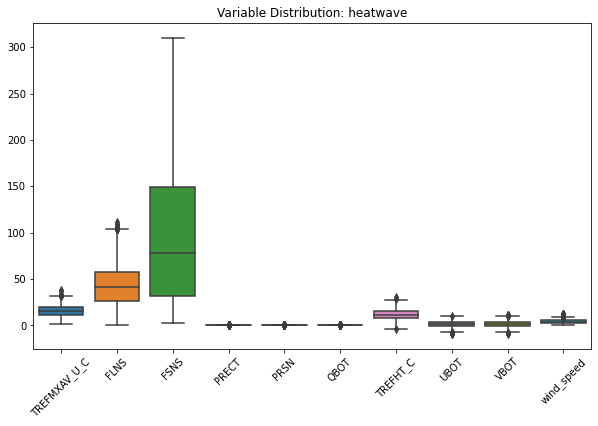

,Z Statistic,p-value,Extreme Sample Size,Normal Sample Size
TREFMXAV_U_C,226.033086,0.0,3621.0,23753.0
FLNS,39.260977,0.0,3621.0,23753.0
FSNS,106.086468,0.0,3621.0,23753.0
PRECT,-36.011973,0.0,3621.0,23753.0
PRSN,-10.725539,0.0,3621.0,23753.0
QBOT,99.412589,0.0,3621.0,23753.0
TREFHT_C,207.090856,0.0,3621.0,23753.0
UBOT,-30.662982,0.0,3621.0,23753.0
VBOT,-34.551638,0.0,3621.0,23753.0
wind_speed,-53.416772,0.0,3621.0,23753.0



--- COLD_DAYS ANALYSIS ---


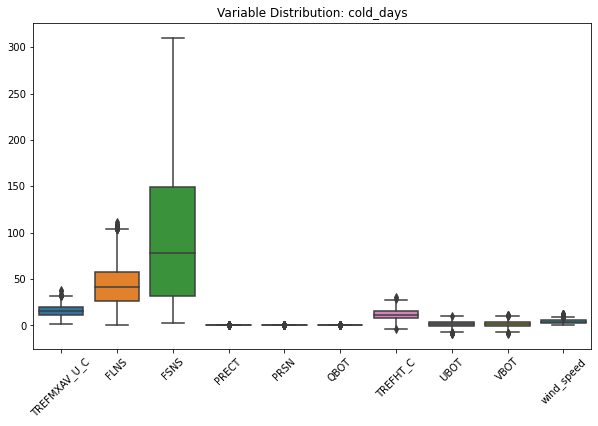

,Z Statistic,p-value,Extreme Sample Size,Normal Sample Size
TREFMXAV_U_C,-159.100535,0.0,991.0,26383.0
FLNS,22.148536,0.0,991.0,26383.0
FSNS,-46.420977,0.0,991.0,26383.0
PRECT,-13.813622,0.0,991.0,26383.0
PRSN,9.078813,0.0,991.0,26383.0
QBOT,-144.751325,0.0,991.0,26383.0
TREFHT_C,-210.131354,0.0,991.0,26383.0
UBOT,-10.354900,0.0,991.0,26383.0
VBOT,-26.122847,0.0,991.0,26383.0
wind_speed,-10.978248,0.0,991.0,26383.0



--- HEAVY_PRECIPITATION ANALYSIS ---


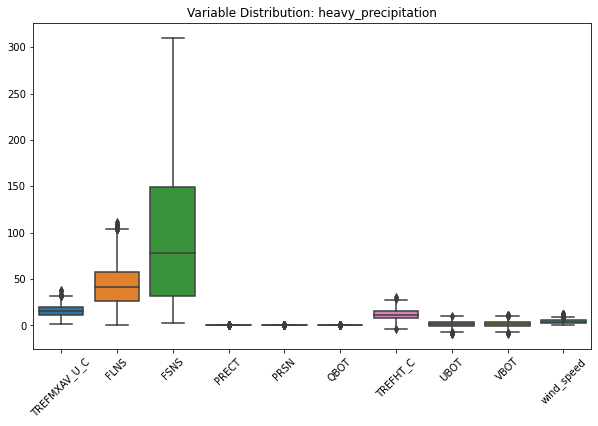

,Z Statistic,p-value,Extreme Sample Size,Normal Sample Size
TREFMXAV_U_C,-10.254530,0.000000e+00,1464.0,25910.0
FLNS,-83.898101,0.000000e+00,1464.0,25910.0
FSNS,-57.791024,0.000000e+00,1464.0,25910.0
PRECT,95.439914,0.000000e+00,1464.0,25910.0
PRSN,5.277451,1.309935e-07,1464.0,25910.0
QBOT,21.507411,0.000000e+00,1464.0,25910.0
TREFHT_C,-2.595633,9.441678e-03,1464.0,25910.0
UBOT,-10.518880,0.000000e+00,1464.0,25910.0
VBOT,12.059555,0.000000e+00,1464.0,25910.0
wind_speed,10.245504,0.000000e+00,1464.0,25910.0



--- STRONG_WINDS ANALYSIS ---


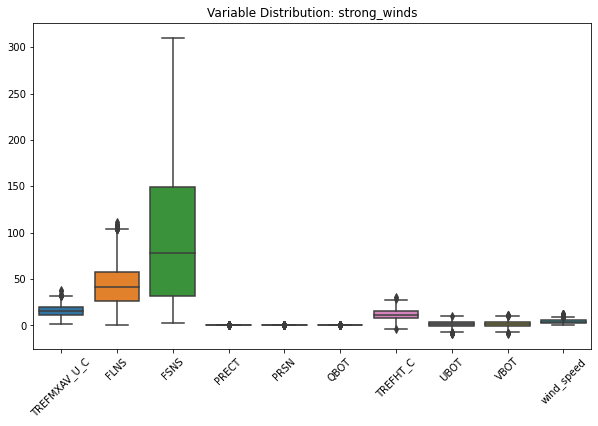

,Z Statistic,p-value,Extreme Sample Size,Normal Sample Size
TREFMXAV_U_C,-42.072948,0.000000,1469.0,25905.0
FLNS,-24.583744,0.000000,1469.0,25905.0
FSNS,-69.225519,0.000000,1469.0,25905.0
PRECT,19.971023,0.000000,1469.0,25905.0
PRSN,-1.284533,0.198955,1469.0,25905.0
QBOT,-24.756554,0.000000,1469.0,25905.0
TREFHT_C,-29.813197,0.000000,1469.0,25905.0
UBOT,38.158211,0.000000,1469.0,25905.0
VBOT,55.273518,0.000000,1469.0,25905.0
wind_speed,194.539810,0.000000,1469.0,25905.0


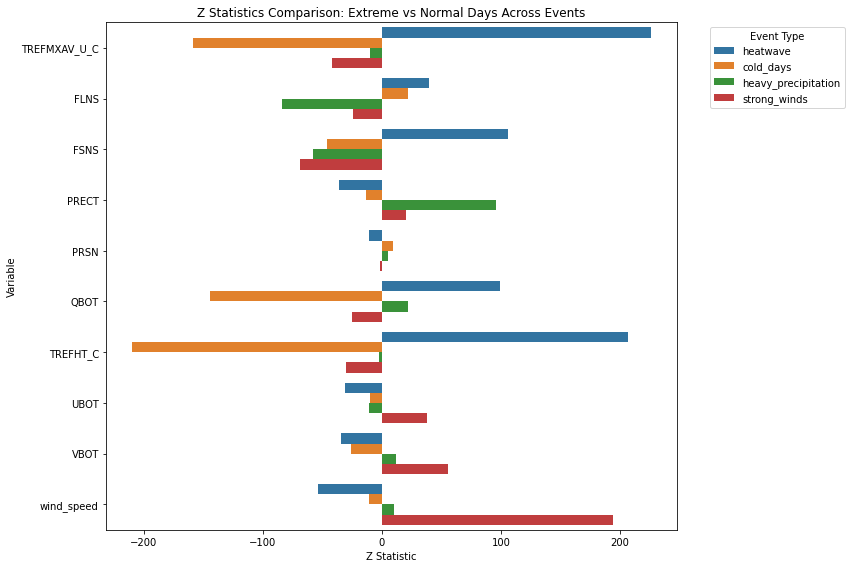

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

def compare_extreme_days(event_col):
    """Compare variable distributions between extreme and normal days, return Z-test results"""
    extreme = df[df[event_col]]
    normal = df[~df[event_col]]
    
    # Create comparative boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=pd.concat([extreme[numeric_cols], normal[numeric_cols]], 
               keys=['Extreme', 'Normal']))
    plt.xticks(rotation=45)
    plt.title(f'Variable Distribution: {event_col}')
    plt.show()
    
    # Perform Z-test for each numeric variable
    results = {}
    for col in numeric_cols:
        # Calculate statistics for both groups
        m1 = extreme[col].mean()
        s1 = extreme[col].std()
        n1 = len(extreme[col])
        
        m2 = normal[col].mean()
        s2 = normal[col].std()
        n2 = len(normal[col])
        
        # Standard error calculation
        se = np.sqrt(s1**2/n1 + s2**2/n2)
        
        # Handle division by zero
        if se == 0:
            Z = np.nan
            p_val = np.nan
        else:
            Z = (m1 - m2) / se
            p_val = 2 * (1 - norm.cdf(abs(Z)))
        
        results[col] = {
            'Z Statistic': Z, 
            'p-value': p_val,
            'Extreme Sample Size': n1, 
            'Normal Sample Size': n2
        }
    
    return pd.DataFrame(results).T

# Initialize DataFrame to store all Z results
all_z_results = pd.DataFrame()

# Process each event type
for event in events:
    print(f"\n--- {event.upper()} ANALYSIS ---")
    event_result = compare_extreme_days(event)
    display(event_result)  # Show detailed results for each event
    
    # Add event type and concatenate results
    event_result['Event'] = event
    all_z_results = pd.concat([all_z_results, event_result])

# Restructure data format for visualization
all_z_results = all_z_results.reset_index().rename(columns={'index': 'Variable'})

# Create comparative horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=all_z_results,
    y='Variable',
    x='Z Statistic',
    hue='Event',
    orient='h'
)
plt.title('Z Statistics Comparison: Extreme vs Normal Days Across Events')
plt.xlabel('Z Statistic')
plt.ylabel('Variable')
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the final comparison plot
plt.savefig('z_statistics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

1. **Lag Effect Analysis (`analyze_lag_effects`)**  
   Examines delayed relationships between meteorological variables and heatwave intensity by:  
   - **Hypothesis 1 (Humidity Precursor)**: Tests if humidity levels (`QBOT`) in preceding days correlate with subsequent heatwave intensity (`TREFMXAV_U`), generating `lag_analysis_1_humidity_heatwave.png`  
   - **Hypothesis 2 (Precipitation Trigger)**: Investigates how precipitation patterns (`PRECT`) and snowfall (`PRSN`) in prior days influence heatwave onset, visualized in `lag_analysis_2_precipitation_heatwave.png`  
   - **Hypothesis 3 (Radiation Dynamics)**: Analyzes delayed impacts of net longwave (`FLNS`) and solar radiation (`FSNS`) on heatwave development, output to `lag_analysis_3_radiation_heatwave.png`  

2. **Core Functionality**  
   - Creates time-lagged variables for specified meteorological parameters  
   - Calculates cross-correlation matrices between lagged variables and heatwave intensity  
   - Generates annotated heatmaps to visualize temporal relationships  
   - Automates high-resolution figure saving with standardized naming  

3. **Technical Implementation**  
   - Configurable lag window through `lag_days` parameter  
   - Modular hypothesis testing structure for extensibility  
   - Integrated visualization pipeline with consistent styling  
   - Memory management through plot closure after saving  

In [31]:
def analyze_lag_effects(df, lag_days=3):
    def save_plot(fig, filename):
        """Helper function to save figures with consistent settings"""
        fig.savefig(
            f"lag_analysis_{filename}.png",
            dpi=300,
            bbox_inches='tight',
            facecolor='white'
        )
        plt.close(fig)

    # Hypothesis 1: Humidity -> Heatwave precursor analysis --------------------
    h1_df = df.copy()
    for i in range(1, lag_days+1):
        h1_df[f'QBOT_lag{i}'] = h1_df['QBOT'].shift(i)  # Create lag features

    # Correlation matrix: Lagged QBOT vs TREFMXAV_U
    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(
        h1_df[[f'QBOT_lag{i}' for i in range(1, lag_days+1)] + ['TREFMXAV_U']].corr(),
        annot=True, 
        cmap='coolwarm',
        vmin=-1, 
        vmax=1
    )
    plt.title("Hypothesis 1: Lagged Humidity vs Heatwave Intensity")
    save_plot(fig, "1_humidity_heatwave")
    plt.show()

    # Hypothesis 2: Precipitation -> Heatwave trigger analysis ----------------
    h2_df = df.copy()
    for i in range(1, lag_days+1):
        h2_df[f'PRECT_lag{i}'] = h2_df['PRECT'].shift(i)  # Total precipitation
        h2_df[f'PRSN_lag{i}'] = h2_df['PRSN'].shift(i)    # Snowfall

    # Correlation matrix: Lagged precipitation vs TREFMXAV_U
    fig = plt.figure(figsize=(12, 8))
    sns.heatmap(
        h2_df[[f'PRECT_lag{i}' for i in range(1, lag_days+1)] +
               [f'PRSN_lag{i}' for i in range(1, lag_days+1)] +
               ['TREFMXAV_U']].corr(),
        annot=True,
        cmap='coolwarm',
        vmin=-1,
        vmax=1
    )
    plt.title("Hypothesis 2: Lagged Precipitation vs Heatwave Onset")
    save_plot(fig, "2_precipitation_heatwave")
    plt.show()

    # Hypothesis 3: Radiation balance -> Heatwave dynamics --------------------
    h3_df = df.copy()
    for i in range(1, lag_days+1):
        h3_df[f'FLNS_lag{i}'] = h3_df['FLNS'].shift(i)  # Net longwave flux
        h3_df[f'FSNS_lag{i}'] = h3_df['FSNS'].shift(i)  # Net solar flux

    # Correlation matrix: Lagged radiation vs TREFMXAV_U
    fig = plt.figure(figsize=(12, 8))
    sns.heatmap(
        h3_df[[f'FLNS_lag{i}' for i in range(1, lag_days+1)] +
               [f'FSNS_lag{i}' for i in range(1, lag_days+1)] +
               ['TREFMXAV_U']].corr(),
        annot=True,
        cmap='coolwarm',
        vmin=-1,
        vmax=1
    )
    plt.title("Hypothesis 3: Lagged Radiation Fluxes vs Heatwave Development")
    save_plot(fig, "3_radiation_heatwave")
    plt.show()

analyze_lag_effects(df, lag_days=3)